In [1]:
import pandas as pd
import time
from datetime import datetime, timedelta
import json
import requests
import re
import os
import numpy as np
import matplotlib as plt 
from bs4 import BeautifulSoup
import warnings
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None


In [2]:
df = pd.read_csv("Cleaned_NFLPlayerDetails.csv")
df

,First Name,Last Name,College,Salary,Team,Position,Age,Experience Years,Draft Year,Draft Round,Agent,Player Status
0,Dak,Prescott,Mississippi State,4.500000e+05,Cowboys,QB,27,5.0,2016,Round 4 (#135 overall),Todd France (CAA Sports),1
1,Aaron,Rodgers,California,2.300000e+05,Packers,QB,37,16.0,2005,Round 1 (#24 overall),David Dunn (Athletes First),1
2,Matthew,Stafford,Georgia,3.100000e+06,Rams,QB,33,12.0,2009,Round 1 (#1 overall),Tom Condon (CAA Sports),1
3,Joey,Bosa,Ohio State,4.500000e+05,Chargers,DE,25,5.0,2016,Round 1 (#3 overall),Brian Ayrault (CAA Sports),1
4,Jimmy,Garoppolo,Eastern Illinois,4.200000e+05,49ers,QB,29,7.0,2014,Round 2 (#62 overall),Don Yee (Yee & Dubin Sports),1
...,...,...,...,...,...,...,...,...,...,...,...,...
4072,Colby,Gossett,Appalachian State,3.838200e+05,Browns,G,25,2.0,2018,Round 6 (#213 overall),"Billy Conaty, Edward Johnson, Tony Agnone (Eas...",1
4073,Jeremiah,Valoaga,Lions,3.008830e+05,Raiders,DE,26,3.0,Undrafted,Undrafted,Nevada-Las Vegas,0
4074,Hunter,Sharp,Eagles,2.375000e+04,Bengals,WR,27,1.0,Undrafted,Undrafted,Utah State,0
4075,LaTroy,Lewis,Unknown,8.640000e+04,Titans,ILB,27,1.0,Undrafted,Undrafted,Tennessee,0


In [3]:
df_no_outliers = pd.read_csv("Cleaned_NFLPlayerDetails_NoOutliers.csv")
df_no_outliers

,First Name,Last Name,College,Salary,Team,Position,Age,Experience Years,Draft Year,Draft Round,Agent,Player Status
0,Dak,Prescott,Mississippi State,450000.000000,Cowboys,QB,27.0,5.0,2016,Round 4 (#135 overall),Todd France (CAA Sports),1
1,Aaron,Rodgers,California,230000.000000,Packers,QB,37.0,NaN,2005,Round 1 (#24 overall),David Dunn (Athletes First),1
2,Matthew,Stafford,Georgia,NaN,Rams,QB,33.0,NaN,2009,Round 1 (#1 overall),Tom Condon (CAA Sports),1
3,Joey,Bosa,Ohio State,450000.000000,Chargers,DE,25.0,5.0,2016,Round 1 (#3 overall),Brian Ayrault (CAA Sports),1
4,Jimmy,Garoppolo,Eastern Illinois,420000.000000,49ers,QB,29.0,7.0,2014,Round 2 (#62 overall),Don Yee (Yee & Dubin Sports),1
...,...,...,...,...,...,...,...,...,...,...,...,...
4072,Colby,Gossett,Appalachian State,383819.960644,Browns,G,25.0,2.0,2018,Round 6 (#213 overall),"Billy Conaty, Edward Johnson, Tony Agnone (Eas...",1
4073,Jeremiah,Valoaga,Lions,300883.000000,Raiders,DE,26.0,3.0,Undrafted,Undrafted,Nevada-Las Vegas,0
4074,Hunter,Sharp,Eagles,23750.000000,Bengals,WR,27.0,1.0,Undrafted,Undrafted,Utah State,0
4075,LaTroy,Lewis,Unknown,86400.000000,Titans,ILB,27.0,1.0,Undrafted,Undrafted,Tennessee,0


(array([ 393.,  245.,  236.,  286.,  435., 1189.,  661.,  232.,  362.,
           5.]),
 array([  2000.,  78300., 154600., 230900., 307200., 383500., 459800.,
        536100., 612400., 688700., 765000.]),
 <BarContainer object of 10 artists>)

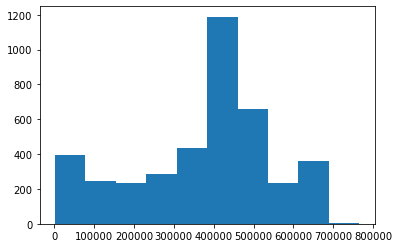

In [4]:
plt.hist(df_no_outliers["Salary"],bins = 10)

<AxesSubplot:ylabel='Team'>

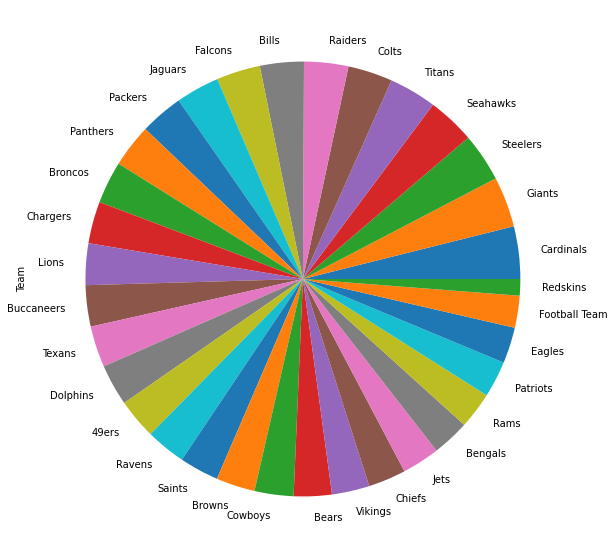

In [5]:
df["Team"].value_counts().plot(kind='pie',figsize=(20,10))

(array([286., 890., 750., 571., 442., 360., 257., 174., 154., 126.]),
 array([20. , 22.1, 24.2, 26.3, 28.4, 30.5, 32.6, 34.7, 36.8, 38.9, 41. ]),
 <BarContainer object of 10 artists>)

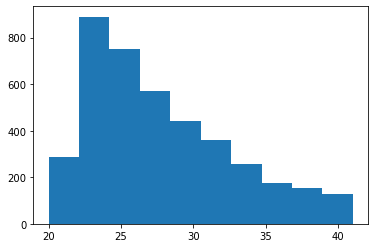

In [6]:
plt.hist(df_no_outliers["Age"],bins = 10)

<AxesSubplot:ylabel='Position'>

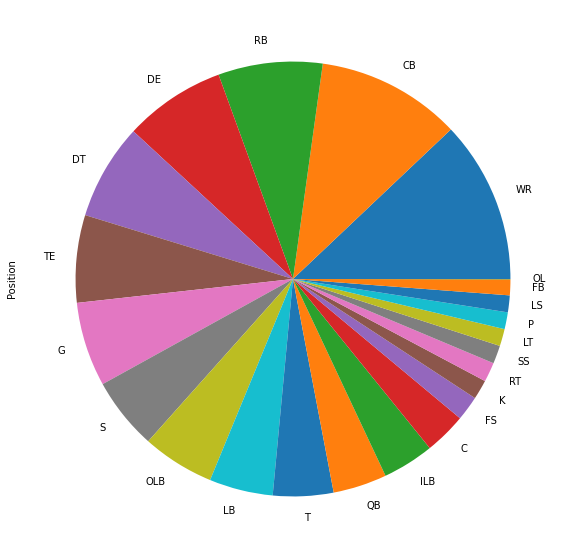

In [7]:
df["Position"].value_counts().plot(kind='pie',figsize=(20,10))

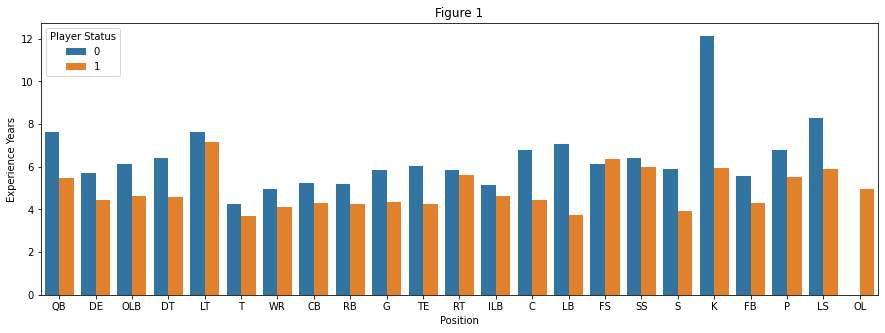

In [8]:
fig,axs=plt.subplots()
fig.set_size_inches(15,5)

p1=sns.barplot(x='Position',y='Experience Years',hue='Player Status',data=df,ax=axs, ci=None)
axs.set_title('Figure 1')
plt.show()

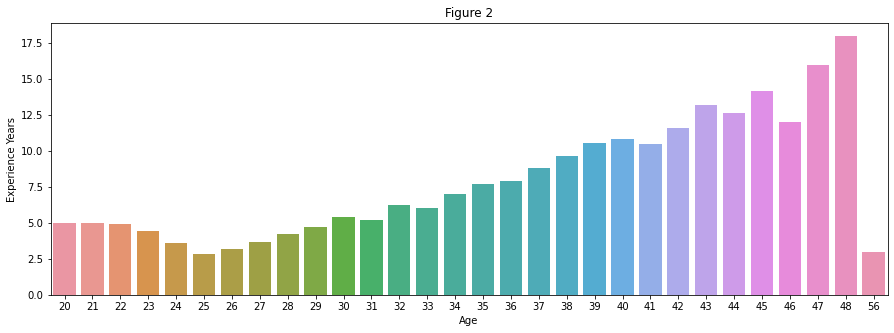

In [9]:
fig,axs=plt.subplots()
fig.set_size_inches(15,5)

p1=sns.barplot(x='Age',y='Experience Years',data=df,ax=axs, ci=None)
axs.set_title('Figure 2')
plt.show()

#at the early ages there was no info on exp year so we filled it with avg

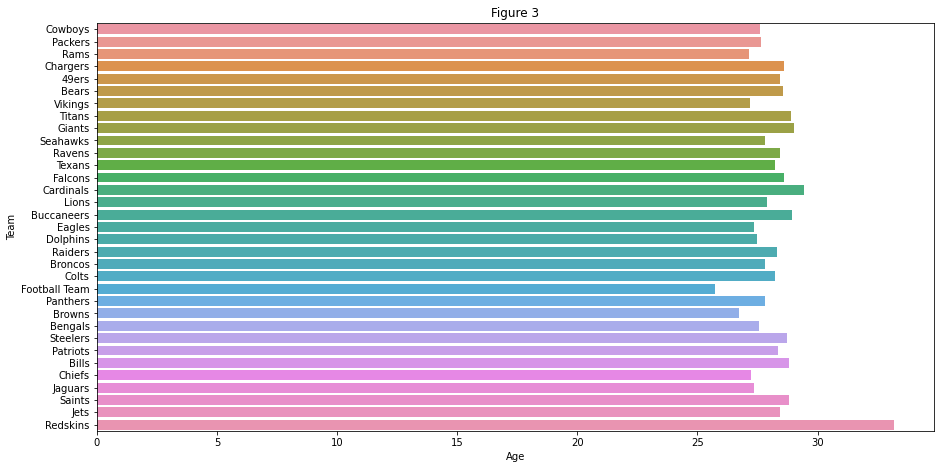

In [10]:
fig,axs=plt.subplots()
fig.set_size_inches(15,7.5)

p1=sns.barplot(x='Age',y='Team',data=df,ax=axs, ci=None)
axs.set_title('Figure 3')
plt.show()

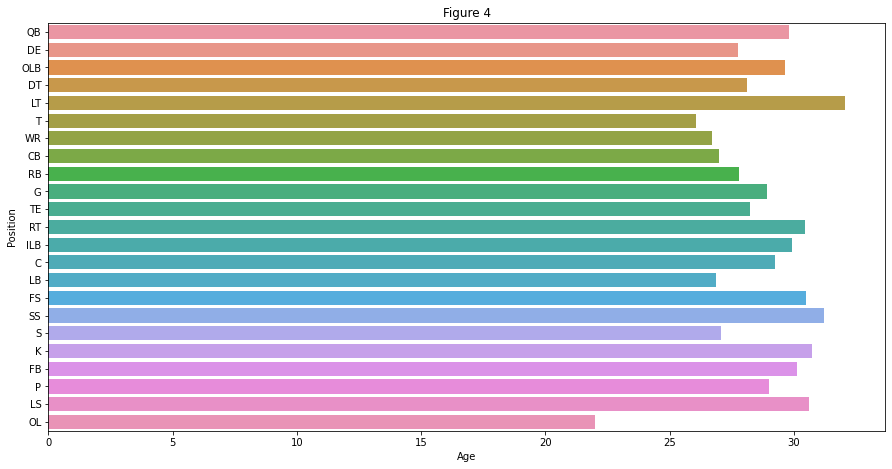

In [11]:
fig,axs=plt.subplots()
fig.set_size_inches(15,7.5)

p1=sns.barplot(x='Age',y='Position',data=df,ax=axs, ci=None)
axs.set_title('Figure 4')
plt.show()

In [12]:
ct1 = pd.crosstab(df_no_outliers["Age"],df["Player Status"])#,normalize = 'index')
ct1

Player Status,0,1
Age,,
20.0,0,4
21.0,3,51
22.0,7,221
23.0,7,409
24.0,13,461
25.0,32,372
26.0,57,289
27.0,77,228
28.0,102,164


<AxesSubplot:xlabel='Age'>

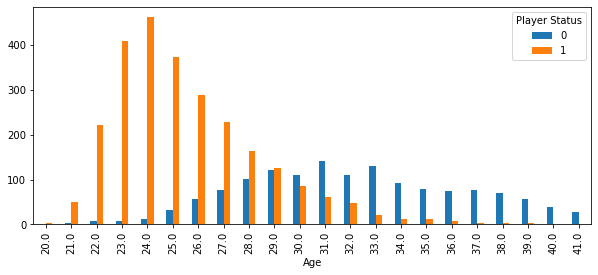

In [13]:
ct1.plot(kind = 'bar',figsize=(10,4))

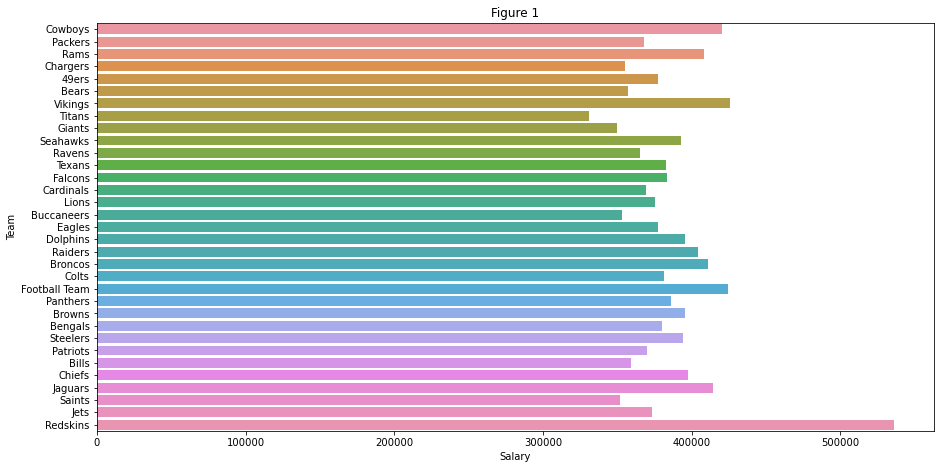

In [14]:
fig,axs=plt.subplots()
fig.set_size_inches(15,7.5)

p1=sns.barplot(x='Salary',y='Team',data=df,ax=axs, ci=None)
axs.set_title('Figure 1')
plt.show()

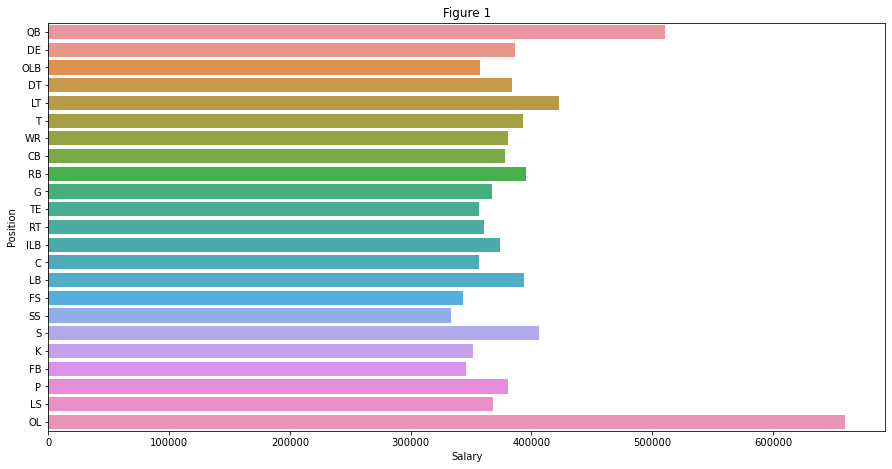

In [15]:
fig,axs=plt.subplots()
fig.set_size_inches(15,7.5)

p1=sns.barplot(x='Salary',y='Position',data=df,ax=axs, ci=None)
axs.set_title('Figure 1')
plt.show()

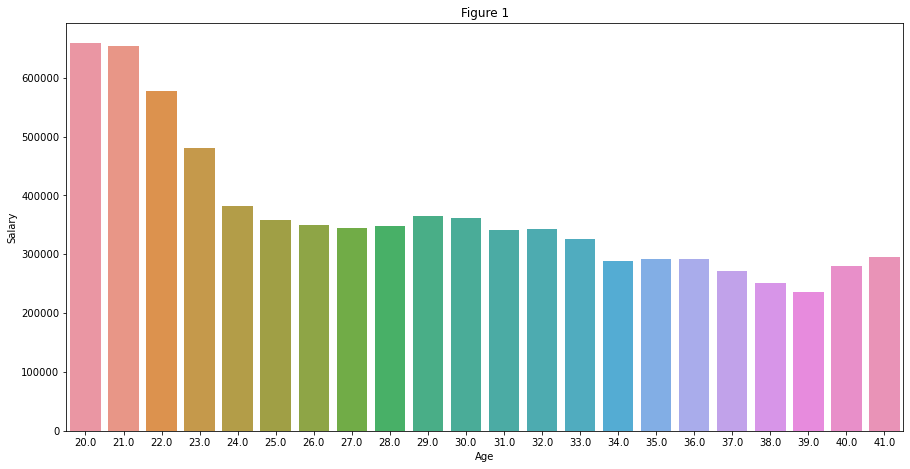

In [16]:
fig,axs=plt.subplots()
fig.set_size_inches(15,7.5)

p1=sns.barplot(x='Age',y='Salary',data=df_no_outliers,ax=axs, ci=None)
axs.set_title('Figure 1')
plt.show()

#the younger the player the more money he will get